In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_DESCRIPTION_PATH = "../Data/Task2/data_description.txt"
DATA_PATH = "../Data/Task2/housing_price_data.csv"

In [2]:
with open(DATA_DESCRIPTION_PATH) as f:
    DATA_DESCRIPTION = f.read()

df = pd.read_csv(DATA_PATH)

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# There is already an Id column (Pandas WoW)
df = df.drop(columns="Id")

# Getting all default columns
current_columns = set(df.columns).copy()

# Removing features with missing data
df = df.dropna(axis=1)

# Getting list of descarded columns
discarded_features = list(current_columns - set(df.columns).copy())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('O')], dtype=object)

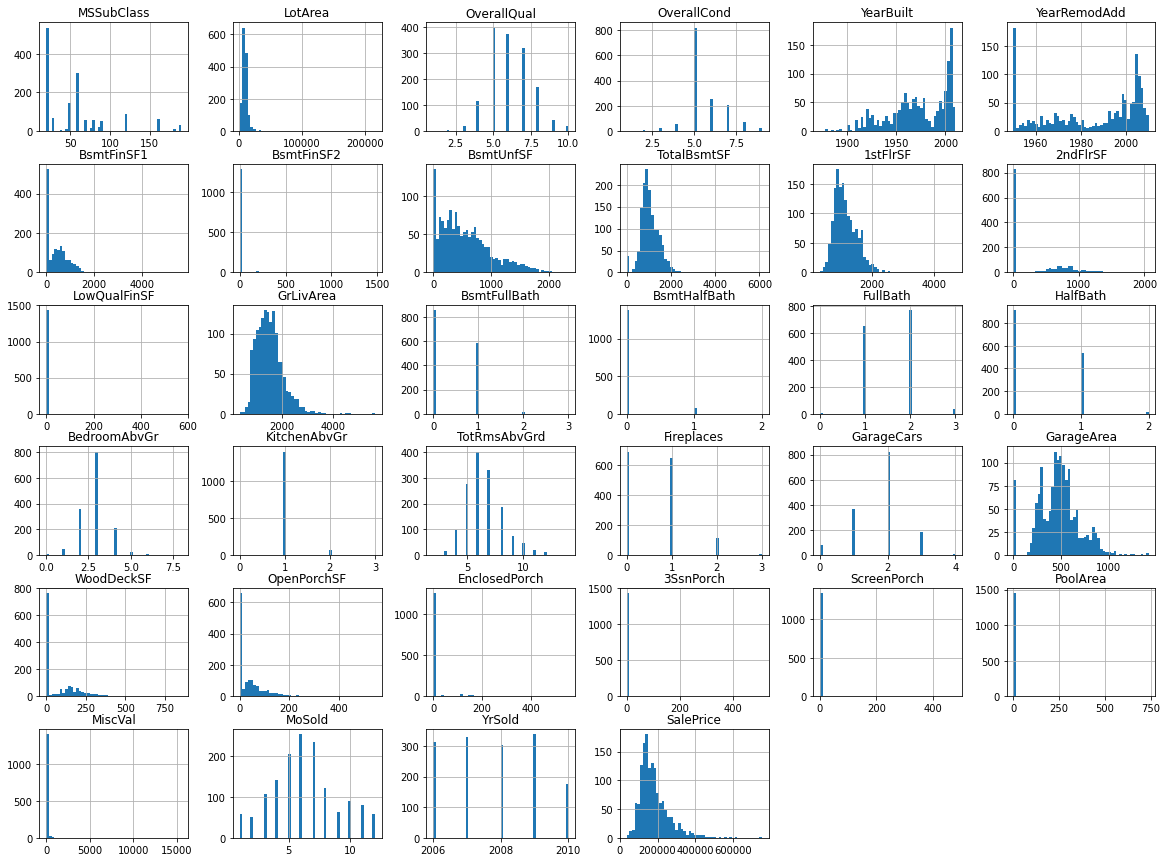

In [7]:
df.hist(bins= 50, figsize= (20, 15))
plt.show() 

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, 
                                       test_size= 0.2,
                                       random_state= 42)
print('Train set:', len(train_set), "+ Test set:", len(test_set))

train_set.to_csv("data/train_set.csv",
                 encoding="utf8",
                 index=False)

test_set.to_csv("data/test_set.csv",
                 encoding="utf8",
                 index=False)

Train set: 1168 + Test set: 292


In [9]:
print(DATA_DESCRIPTION)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [10]:
# Saving all fields by type for later transofrmation and encoding

nominal_fields = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", 
                  "LotConfig", "Neighborhood", "Condition1", "Condition2",
                  "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
                  "MasVnrType", "Foundation", "Heating", "CentralAir", 
                  "Electrical", "GarageType", "MiscFeature", "SaleType"]

ordinal_fields = ["LandContour", "Utilities", "LotShape", "LandSlope", "HouseStyle",
                  "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure",
                  "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual",
                  "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
                  "GarageCond", "PavedDrive", "PoolQC", "Fence", "SaleCondition"]

numerical_fields = ["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", 
                    "1stFlrSF", "2ndFlrSF","LowQualFinSF", "GrLivArea",
                    "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
                    "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
                    "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF",
                    "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch",
                    "PoolArea", "MiscVal", "YrSold", "LotFrontage", "LotArea",
                    "OverallCond", "OverallQual", "YearBuilt"]

label = ["SalePrice"]

In [11]:
# Remove discarded features from field groups
field_groups = {"nominal_fields": nominal_fields, 
                "ordinal_fields": ordinal_fields, 
                "numerical_fields": numerical_fields}

[print(len(field_group)) for field_group in field_groups.values()]
print("All features: ", sum([len(field_group) for field_group in field_groups.values()]))

for field_group in field_groups:
    field_groups[field_group] = [field for field in field_groups[field_group]
                                 if field not in discarded_features]
    
[print(len(field_group)) for field_group in field_groups.values()]
print("All features: ", sum([len(field_group) for field_group in field_groups.values()]))

21
23
32
All features:  76
16
12
29
All features:  57


In [12]:
# Reassign the df to the train_set
df = train_set.copy().reset_index(drop=True)

In [13]:
# Getting Top 10 features based on positive correlation value with target
df.corr().sort_values("SalePrice", ascending=False).head(11)["SalePrice"].iloc[1:] # iloc starts from 1: to remove target (100% corr)

# Getting Top 10 features based on positive correlation value with target
df.corr().sort_values("SalePrice", ascending=True).head(11)["SalePrice"].iloc[1:] # iloc starts from 1: to remove target (100% corr)

KitchenAbvGr   -0.142785
MSSubClass     -0.088081
OverallCond    -0.074391
BsmtHalfBath   -0.048346
MiscVal        -0.020179
LowQualFinSF   -0.011189
YrSold         -0.009099
BsmtFinSF2     -0.005731
MoSold          0.041890
3SsnPorch       0.051532
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

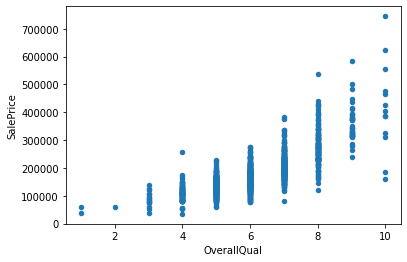

In [14]:
df.plot(kind="scatter", x="OverallQual", y="SalePrice")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

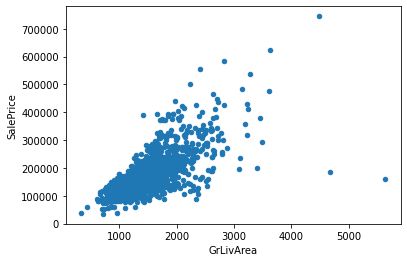

In [15]:
df.plot(kind="scatter", x="GrLivArea", y="SalePrice")

In [16]:
# Dropping the label from the DataFrame
label = df["SalePrice"].copy()
df.drop(columns=['SalePrice'], inplace=True)

In [17]:
# Building the Data Processing and Encoding Pipeline


from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer 


pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), field_groups["numerical_fields"]),
    ("ordinal", OrdinalEncoder(), field_groups["ordinal_fields"]),
    ("nominal", LabelEncoder(), field_groups["nominal_fields"])
])

# Running LabelEncoder in the Pipeline will result in a TypeError (according to the Stackoverflow community, its a bug
# as LabelEncoder is intended to be used only with Series data)
try:
    pipeline.fit_transform(df)
except Exception as e:
    print(e)


fit_transform() takes 2 positional arguments but 3 were given


In [18]:
# Creating a custom label encoder to be able to work with multiple nominal features

from sklearn.base import TransformerMixin, BaseEstimator

class MultiColumnLabelEncoder(TransformerMixin, BaseEstimator):
    def __init__(self, columns=None):
        self.columns = columns  # array of column names to encode

    def fit(self, X, y=None):
        return self  # not relevant here

    def transform(self, X):
        """
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        """
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


In [19]:
# Finishing the pipeline and processing the DataFrame

pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), field_groups["numerical_fields"]),
    ("ordinal", OrdinalEncoder(), field_groups["ordinal_fields"]),
    ("nominal", MultiColumnLabelEncoder(), field_groups["nominal_fields"])
])

df_processed = pipeline.fit_transform(df)

In [20]:
# Modelling Time!

# Using LinearRegression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_processed, label)

LinearRegression()

In [21]:
some_data = df.iloc[:5]
some_labels = label.iloc[:5]

some_data_processed = pipeline.transform(some_data)

In [22]:
print("Predictions: ", lin_reg.predict(some_data_processed))
print("Expected: ", list(some_labels))

Predictions:  [-1.29708435e+16  1.75235870e+05 -1.29708435e+16 -1.29708435e+16
 -1.29708435e+16]
Expected:  [145000, 178000, 85000, 175000, 127000]


> I assume I failed somewhere with encoding the ordinal features... Let's try the pipeline without them :) 

In [23]:
# Finishing the pipeline and processing the DataFrame

pipeline = ColumnTransformer([
    ("numerical", StandardScaler(), field_groups["numerical_fields"]),
    #("ordinal", OrdinalEncoder(), field_groups["ordinal_fields"]),
    ("nominal", MultiColumnLabelEncoder(), field_groups["nominal_fields"])
])

df_processed = pipeline.fit_transform(df)

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(df_processed, label)

some_data = df.iloc[:5]
some_labels = label.iloc[:5]

some_data_processed = pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_processed))
print("Expected: ", list(some_labels))

Predictions:  [157617.82004892 209759.86837521  96738.68069218 178477.71280205
 147344.61339311]
Expected:  [145000, 178000, 85000, 175000, 127000]


> Ahhh, much better! These seem very close. Let's check the RMSE!

In [25]:
# Getting the RMSE

from sklearn.metrics import mean_squared_error

all_predictions = lin_reg.predict(df_processed)
lin_RMSE = np.sqrt(mean_squared_error(label, all_predictions))
print(lin_RMSE)

33695.82644826594


In [26]:
label.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

> Having 130,000 and 213,925 the 25/75% quartiles, a prediction error of 33,695 means the model is underfitting.

In [27]:
# Random Forest Regressor!

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_processed, label)
all_predictions = forest_reg.predict(df_processed)

In [28]:
forest_RMSE = np.sqrt(mean_squared_error(label, all_predictions))
forest_RMSE

11383.53664984087

In [29]:
# K-Fold Cross-Validation

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_processed, label,
                               scoring= 'neg_mean_squared_error', cv= 10)
forest_rmse_scores = np.sqrt(-forest_scores)


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())
    
display_scores(forest_rmse_scores)

Scores: [19317.78667665 32181.70158096 23836.48466204 43240.35627737
 42637.63501441 34024.6886288  27462.6125127  23866.00397878
 24958.6176946  25172.57171938]
Mean: 29669.845874570827
Std: 7744.463962086286


In [30]:
lin_reg_scores = cross_val_score(lin_reg, df_processed, label,
                               scoring= 'neg_mean_squared_error', cv= 10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_reg_rmse_scores)

Scores: [28766.11024598 46995.28969068 28084.03819369 44626.04323933
 67811.4778365  38307.21594127 29233.72814381 23542.32940538
 28293.96800246 28025.95257984]
Mean: 36368.61532789461
Std: 12845.915994841438


> Random Forest Regressor had a better RMSE value, which makes sense since it's a more complicated model (ensemble of models), and it was better able to fit the dataset